# [PY-07] NumPy and Matplotlib

## NumPy arrays

This lecture expands the catalog of data containers with a new type, the **NumPy array**. We have seen in a previous lecture how to apply a function to all the items of a list with a `for` loop. The procedure was simple, but it gets inefficient when the list is long. With NumPy arrays we have tools to do that faster and also for operating with data containers to obtain new data containers. 

The NumPy arrays are modeled after objects that you may have found (and perhaps tried to elude) in your mathematical experience, vectors and matrices. In mathematics, a **vector** is a sequence of numbers, and a **matrix** a rectangular arrangement of numbers. Operations with vectors and matrices are the subject of a branch of mathematics called **linear algebra**. In the Python library **NumPy** (and in many other places), vectors are called one-dimensional (1D) arrays, while matrices are called two-dimensional (2D) arrays. Moreover, arrays of more than two dimensions can be managed without pain with NumPy.

Unlike mathematical vectors and matrices, NumPy arrays are not necessarily numeric. But all the terms of an array must have the same type, so the array itself can have a type. In order to cope with the complexities of the data analysis, NumPy provides additional data types, like the type `object`, but this sophistication is not used in this course.  

The usual way to import NumPy is:

In [1]:
import numpy as np

A 1D array can be created directly from a list (or a range) with the NumPy function `array`. A simple example follows.

In [2]:
arr1 = np.array(range(10))
arr1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Numeric and string arrays are created in the same way. When the items of the data source have different type, they are converted to a common type when creating the array. The following examples illustrate this. Can you guess what is the logic in these conversions?

In [3]:
np.array([2, 'a', True])

array(['2', 'a', 'True'], dtype='<U11')

In [4]:
np.array([2, True])

array([2, 1])

In [5]:
np.array([2, 3.2])

array([2. , 3.2])

*Note*. The data type is not shown for numeric arrays, only for string type. For strings, the notation is not friendly. In this example, `dtype='<U21'` looks a bit exotic. Don't pay attention.

A 2D array can be directly created from a list of lists of equal length. The terms are entered row-by-row, as in the following example.

In [6]:
arr2 = np.array([[0, 7, 2, 3], [3, 9, -5, 1]])
arr2

array([[ 0,  7,  2,  3],
       [ 3,  9, -5,  1]])

Don't forget that, though we visualize a vector as a column (or a row) and a matrix as a rectangular arrangement, with rows and columns, it is not so in the computer. A 1D array is just a sequence of elements of the same type, neither horizontal nor vertical. It has one **axis**, the 0-axis. In a similar way, a 2D array is a sequence of 1D arrays of the same length and type. It has two axes. In our visualization of rows and columns, `axis=0` means across rows, while `axis=1` means across columns.

The number of terms stored along an axis is the **dimension** of that axis. The dimensions are collected in the attribute **shape**.

In [7]:
arr1.shape

(10,)

In [8]:
arr2.shape

(2, 4)

The terms of a 1D array are extracted just as those of a list. So, the third term of `arr1` comes as:

In [9]:
arr1[2]

2

For a 2D array, you need two indexes inside the square brackets: The first index selects the row (`axis=0`), and the second index the column (`axis=1`). So, the term in the intersection of the second row and the third column of `arr2` comes as:


In [10]:
arr2[1, 2]

-5

## NumPy functions

NumPy incorporates vectorized forms of the mathematical functions of the package `math`. A **vectorized function** is one that, when applied to an array, returns an array with same shape, whose terms are the values of the function on the corresponding terms of the original array. The NumPy square root function is an example.

In [11]:
np.sqrt(arr1)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

The functions that are defined in terms of vectorized functions are automatically vectorized. An example follows.

In [12]:
def f(t):
    return 1/(1 + np.exp(t))
f(arr2)

array([[5.00000000e-01, 9.11051194e-04, 1.19202922e-01, 4.74258732e-02],
       [4.74258732e-02, 1.23394576e-04, 9.93307149e-01, 2.68941421e-01]])

Unfortunately, this will not happen so automatically for the functions that you may define, for instance for functions which involve loops and coditionals. NumPy provides the function `vectorize()`, which transforms a function into a vectorized function. 

NumPy also provides common **statistical functions**, such as `mean()`, `max()`, `sum()`, etc.

## Subsetting arrays

A 1D array can be **sliced** just as a list:

In [13]:
arr1[:3]

array([0, 1, 2])

Slicing both rows and columns of a 2D array is called **dicing**. An example follows.

In [14]:
arr2[:1, 1:]

array([[7, 2, 3]])

Subarrays can also be extracted by means of an **expression**. When you input the expression formed by an array, a comparison operator (such as `>`) and a **literal** (such as 3), the expression is evaluated, and the Python kernel returns a Boolean array with the same shape:

In [15]:
arr1 > 3

array([False, False, False, False,  True,  True,  True,  True,  True,
        True])

In [16]:
arr2 > 2

array([[False,  True, False,  True],
       [ True,  True, False, False]])

A Boolean array that is used to extract a subarray is called a **Boolean mask**. The terms selected are those for which the mask has value `True`. To get that, we put the Boolean mask inside square brackets.

In [17]:
arr1[arr1 > 3]

array([4, 5, 6, 7, 8, 9])

1D Boolean masks are often used to filter out rows of a data set. In the following section we present an easy example, filtering by gender.

## An example

The **body mass index** (BMI) is defined as the body mass (kg) divided by the square of the body height (m2). The following three lists contain data for calculating the BMI of 15 people, plus the gender. 

In [18]:
height = [1.65, 1.73, 1.51, 1.63, 1.69, 1.7, 1.81, 1.66, 1.58, 1.66, 1.62, 1.81, 1.75, 1.65, 1.65]
weight = [61.6, 59.5, 46.5, 75.3, 47.6, 80.2, 67.5, 64.1, 69.5, 57.0,68.6, 69.3, 53.2, 66.1, 50.6]
gender = ['M', 'M', 'F', 'F', 'M', 'F', 'M', 'F', 'F', 'M', 'F', 'M', 'F', 'M', 'M']

We convert these lists to 1D arrays to perform the calculations.

In [19]:
height = np.array(height)
weight = np.array(weight)
gender = np.array(gender)

Thanks to vectorization, the same formula that would be used to calculate the BMI for a single person works for arrays. 

In [20]:
bmi = weight/height**2
bmi

array([22.62626263, 19.88038357, 20.39384238, 28.34130001, 16.66608312,
       27.75086505, 20.60376667, 23.26172159, 27.84008973, 20.68515024,
       26.13930803, 21.15320045, 17.37142857, 24.27915519, 18.58585859])

Now, suppose that we want to report the average BMI, for the whole sample, and separately for female and male subjects, with one decimal. For the whole sample:

In [21]:
bmi.mean().round(1)

22.4

To get the average for the female subsample, we create a filter with the Boolean mask `bmi[gender == 'F']`.

In [22]:
bmi[gender == 'F'].mean().round(1)

24.4

For the male subsample:

In [23]:
bmi[gender == 'M'].mean().round(1)

20.6

*Note*. We have used here `mean()` and `round()` as methods, but you cxan move them to the other side of the expression, as functions.

## Plotting with Matplotlib

Inspired in MATLAB, a classic of numeric computing, **Matplotlib** is a Python library containing an impressive range of graphical methods, including image processing. As some other libraries in the Python world, Matplotlib has several API's, which makes it a bit confusing for the beginners. In this context, an **application programming interface** (API) is like an idiom that you use for calling the functions of the library. It defines the kinds of requests that can be made and how to make them. 

Matplotlib offers you a choice between two API's, the **pyplot API** and the **object-oriented API**. This course uses the pyplot API. Beware that, if you search for help in the Internet, the solutions found can come in any of the two API's. Due to this mix, Matplotlib may look a bit confusing to the beginner.

The subpackage `matplotlib.pyplot` is a collection of command style functions that make Matplotlib work like MATLAB. It is typically imported as:

In [24]:
import matplotlib.pyplot as plt

To create a figure with `pyplot`, we put together in a single input one or several functions. Each `pyplot` function makes some change to the figure, such as changing the default size, adding a title, plotting lines, decorating the plot with labels, etc. This is illustrated by the following example, in which we plot together three curves, a linear, a quadratic and a cubic curve. 

First, we fill a 1D array with linearly spaced values. With 100 points, we can create a visual effect so the lines look like smooth curves.

In [25]:
t = np.linspace(0, 2, 100)

Next, we ask for the plot, that A Jupyter app will display as Figure 1.

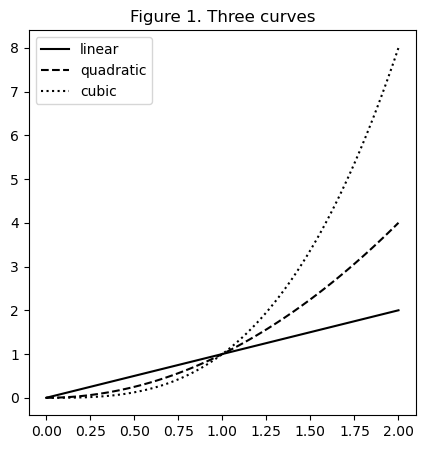

In [26]:
plt.figure(figsize=(5,5))
plt.title('Figure 1. Three curves')
plt.plot(t, t, label='linear', color='black')
plt.plot(t, t**2, label='quadratic', color='black', linestyle='dashed')
plt.plot(t, t**3, label='cubic', color='black', linestyle='dotted')
plt.legend();

Take care of inputting these lines of code together. The semicolon in the last line stops the Python output showing up. That output would correspond to `plt.legend` and would not say much to you. 

`plt.figure` allows you to change some default specifications. Here, we have changed the size. If you are satisfied with the default size `figsize=(6,4)`, you do not need this line of code. Here, `figsize=(5,5)` has been set so that the figure looks fine on the screen. The units for the width and height and are inches.

`plt.plot` creates a **line chart**. If two vectors are entered, the first one is taken as $x$ (horizontal axis) and the second one as $y$ (vertical axis). If there is only one vector, it is taken as $y$, and the index is used as $x$. Here, we get a multiple line chart by calling `plt.plot` multiple times. Note that, even if you see the three components plotted here as three curves, they are really line charts without markers.

`plt.plot` admits other arguments, allowing a minute edition of your visualization, down to the smallest detail. As a default, it uses solid lines, with different colors for the different lines. The **line style** has been specified by the argument `linestyle`, and the **color** by the argument `color`. The defaults are `color='blue'` and `linestyle='solid'`.